# Random Forest Multiclass Classifier example
In this notebook, a [Random Forest Classification Model](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) employing the **iris** dataset, which consists of a dataset with features (e.g. petal width, sepal lenght, etc) and species for flowers of the [<i>iris</i> genus](https://en.wikipedia.org/wiki/Iris_(plant)). Additional information about this dataset can be found [here](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).


**>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Ricardo M. Domingues [11/25/2020]**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

sns.set() # making plots default to seaborn style

### Part-1: Loading & initial inspection of the **iris** dataset
**note:** the `.sample.reset_index(drop=True)` loads the iris dataset and imediately randomizes it, droping the original indexes

In [2]:
iris_df = sns.load_dataset('iris').sample(frac=1).reset_index(drop=True)
iris_df.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
147,5.8,2.7,3.9,1.2,versicolor
148,7.0,3.2,4.7,1.4,versicolor
149,5.7,2.9,4.2,1.3,versicolor


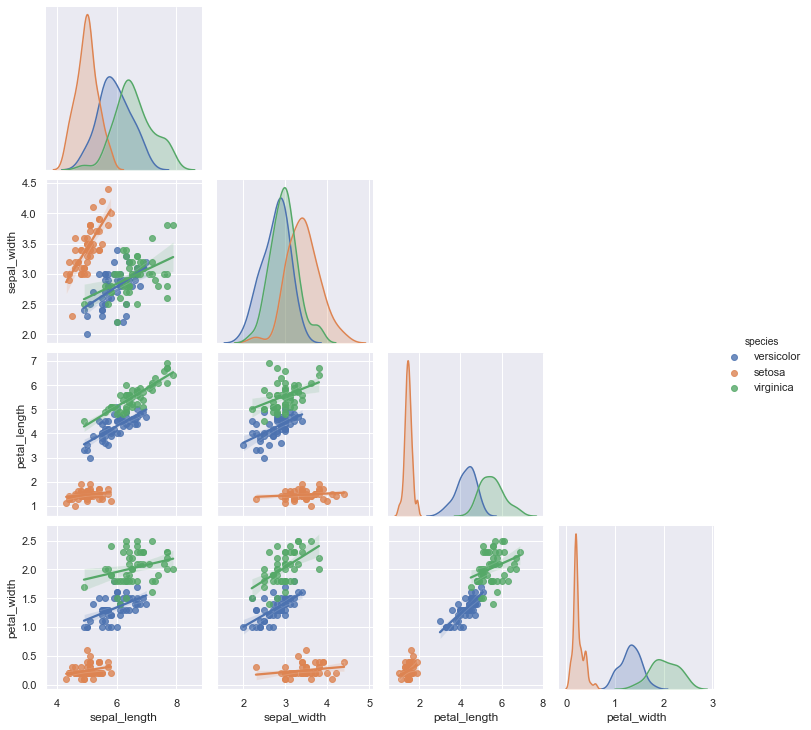

In [3]:
# pairplot allows a quick assessment of the distribution of the values, and we will separated in by species using the hue parameter
sns.pairplot(iris_df,hue='species',corner=True,kind='reg',diag_kind='kde')

This quick analysis reveals that most of the features in fact exhibit different distributions depending on the species, and that differences in **petal_lenght** and **petal_width** are more pronounced. There is also hints of linear relationships between some variables such as petal_lenght vs. petal_width, etc.

We can further evaluate such differences with a violin plot of the **petal_length**, for example.

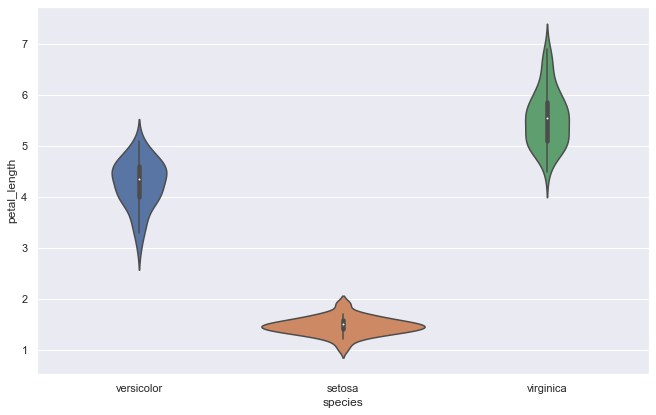

In [4]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_axes([0.1, 0.1, .85, .85])
sns.violinplot(ax=ax1, x='species',y='petal_length',data=iris_df)

**Note that** in fact the distribuiton of values in terms of **petal_lenght** is clearly different between species. Therefore, it is petal_lenght is a key parameter to define the different species, and it is expected that our model will learn that.

Before proceding, the `species` class labels are first factorized into numeric data (e.g. `species_id`), which will be later required to train/test the RandomForest model 

In [5]:
iris_df['species_id'] = pd.factorize(iris_df['species'])[0]
unique_species_name   = pd.factorize(iris_df['species'])[1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,6.4,2.9,4.3,1.3,versicolor,0
1,4.9,3.6,1.4,0.1,setosa,1
2,5.4,3.0,4.5,1.5,versicolor,0
3,5.5,2.4,3.7,1.0,versicolor,0
4,4.8,3.0,1.4,0.1,setosa,1


### Part-2: Splitting and Scaling the training and test data

**step-1** separating the data into independent and dependent variables

In [6]:
X = iris_df.iloc[:,0:4].values
y = iris_df.iloc[:,5].values

**step-2** Splitting into **train** (80% of the data) and **test** data (20% of the data)

**note** at this stage, the data had already been shuffled. The sklearn `train_test_split` function offers yet another simple way for shuffling the data, using the `random_state` and `shuffle` paramenters.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 21, shuffle=True)

**step-3** Scaling the data using the sklearn built in `StandardScaler`

First the `scalar`object is fitted to the train data

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

print('Mean values of each feature',scaler.mean_)
print('Variance of each feature',scaler.var_)

Mean values of each feature [5.86083333 3.08166667 3.79       1.215     ]
Variance of each feature [0.68954931 0.19299722 3.1584     0.593275  ]


Now the same `scalar` object is used to standardize the **test** dataset, given that they should be standardized using the same exact mean and standard deviation. The `scalar` object may also be saved for later classification of any new <i>iris</i> data that becomes available.

In [9]:
X_test = scaler.transform(X_test)

### Part-3: Training the model
To train the model, we simply call the sklearn `RandomForestClassifier` method, and fit the **train** data

In [10]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Part-4: Evaluting the model performance
To assess the model performance in detail, the interactive dashboard [explainerdashboard](https://explainerdashboard.readthedocs.io/en/latest/) is used.
This tool requires the dataset to be stored in **pandas** DataFrames, so first we populate their respectives dataframes

In [11]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [12]:
X_test_df = pd.DataFrame(data=X_test,columns=iris_df.columns[0:4])
y_test_df = pd.Series(data=y_test)

In [13]:
explainer = ClassifierExplainer(model, b, y_test_df, target='species_id', labels=list(unique_species_name))
db = ExplainerDashboard(explainer, title="Predicting Species",mode='inline', width=1000, height=1000)
db.run()

Note: shap=='guess' so guessing for RandomForestClassifier shap='tree'...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Building ExplainerDashboard..
Generating ShadowDecTree for each individual decision tree...
Generating layout...
Calculating shap values...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating categorical permutation importances (if slow, try setting n_jobs parameter)...
Calculating prediction probabilities...
Calculating predictions...
Calculating pred_percentiles...
Calculating shap interaction values...
Registering callbacks...


The trained **model** can now be employed to make predictions on any future samples, for easily classifying the species. For example:

In [85]:
sample_id = 6
sp        = model.predict(X_test[sample_id].reshape(1,-1))
sp_prob   = list(model.predict_proba(X_test[sample_id].reshape(1,-1)))

print('Sample ID = {} is {:.0f}% likely a {}'.format(sample_id, (sp_prob[0][sp][0])*100, list(unique_species_name)[int(sp)] ) )

Sample ID = 6 is 99% likely a virginica


### Final Remarks
- The final model accuracy was 100% correct. Meaning that all samples from the test dataset were correctly classified in their known species.
- **petal_length** and **petal_width** were in fact the two most important features used by the trained model to classify samples